# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I Busisiwe Dlala, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [10]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
from scipy import stats


# Libraries for data preparation and model building
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 42

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [11]:
df_train = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv')

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [12]:
# look at data statistics
df_train.head(2)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667


In [13]:
# plot relevant feature interactions
df_test.head(2)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.0,71.333333,20.0,3.000000,...,287.816667,280.816667,287.356667,276.150000,280.38,286.816667,285.15,283.15,279.866667,279.15
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.0,78.000000,0.0,3.666667,...,284.816667,280.483333,284.190000,277.816667,281.01,283.483333,284.15,281.15,279.193333,278.15


In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

In [15]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2920 non-null   int64  
 1   time                  2920 non-null   object 
 2   Madrid_wind_speed     2920 non-null   float64
 3   Valencia_wind_deg     2920 non-null   object 
 4   Bilbao_rain_1h        2920 non-null   float64
 5   Valencia_wind_speed   2920 non-null   float64
 6   Seville_humidity      2920 non-null   float64
 7   Madrid_humidity       2920 non-null   float64
 8   Bilbao_clouds_all     2920 non-null   float64
 9   Bilbao_wind_speed     2920 non-null   float64
 10  Seville_clouds_all    2920 non-null   float64
 11  Bilbao_wind_deg       2920 non-null   float64
 12  Barcelona_wind_speed  2920 non-null   float64
 13  Barcelona_wind_deg    2920 non-null   float64
 14  Madrid_clouds_all     2920 non-null   float64
 15  Seville_wind_speed   

In [16]:
df_train.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,8762.000000,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


In [17]:
df_test.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,...,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000
mean,10222.500000,2.457820,0.067517,3.012785,67.123516,62.644463,43.355422,2.283562,15.477283,162.643836,...,290.695462,288.888393,289.911289,284.920684,286.522375,289.124971,288.483641,290.152431,287.869763,286.618130
std,843.075718,1.774838,0.153381,1.996340,20.611292,24.138393,30.486298,1.654787,25.289197,97.749873,...,7.113599,9.089699,7.119411,6.803424,6.492355,7.168049,6.221324,7.906915,8.977511,8.733163
min,8763.000000,0.000000,0.000000,0.000000,11.666667,8.000000,0.000000,0.000000,0.000000,0.000000,...,273.816667,269.816667,272.650000,266.483333,268.120000,271.483333,270.138667,271.150000,268.713333,267.816667
25%,9492.750000,1.333333,0.000000,1.666667,52.000000,43.000000,13.333333,1.000000,0.000000,86.666667,...,284.816667,281.483333,284.307500,280.150000,281.778333,283.483333,284.150000,284.483333,280.816667,279.816667
50%,10222.500000,2.000000,0.000000,2.333333,70.333333,63.000000,45.000000,1.666667,0.000000,140.000000,...,290.150000,287.483333,289.483333,284.483333,286.265000,288.816667,288.483333,289.150000,286.396667,285.483333
75%,10952.250000,3.333333,0.000000,4.000000,85.000000,84.000000,75.000000,3.333333,20.000000,233.333333,...,296.483333,295.483333,295.816667,289.816667,291.119167,295.150000,292.816667,295.150000,294.452500,293.150000
max,11682.000000,13.333333,1.600000,14.333333,100.000000,100.000000,97.333333,10.666667,93.333333,360.000000,...,309.483333,313.483333,308.150000,307.483333,308.966667,306.816667,310.816667,314.483333,312.223333,310.150000


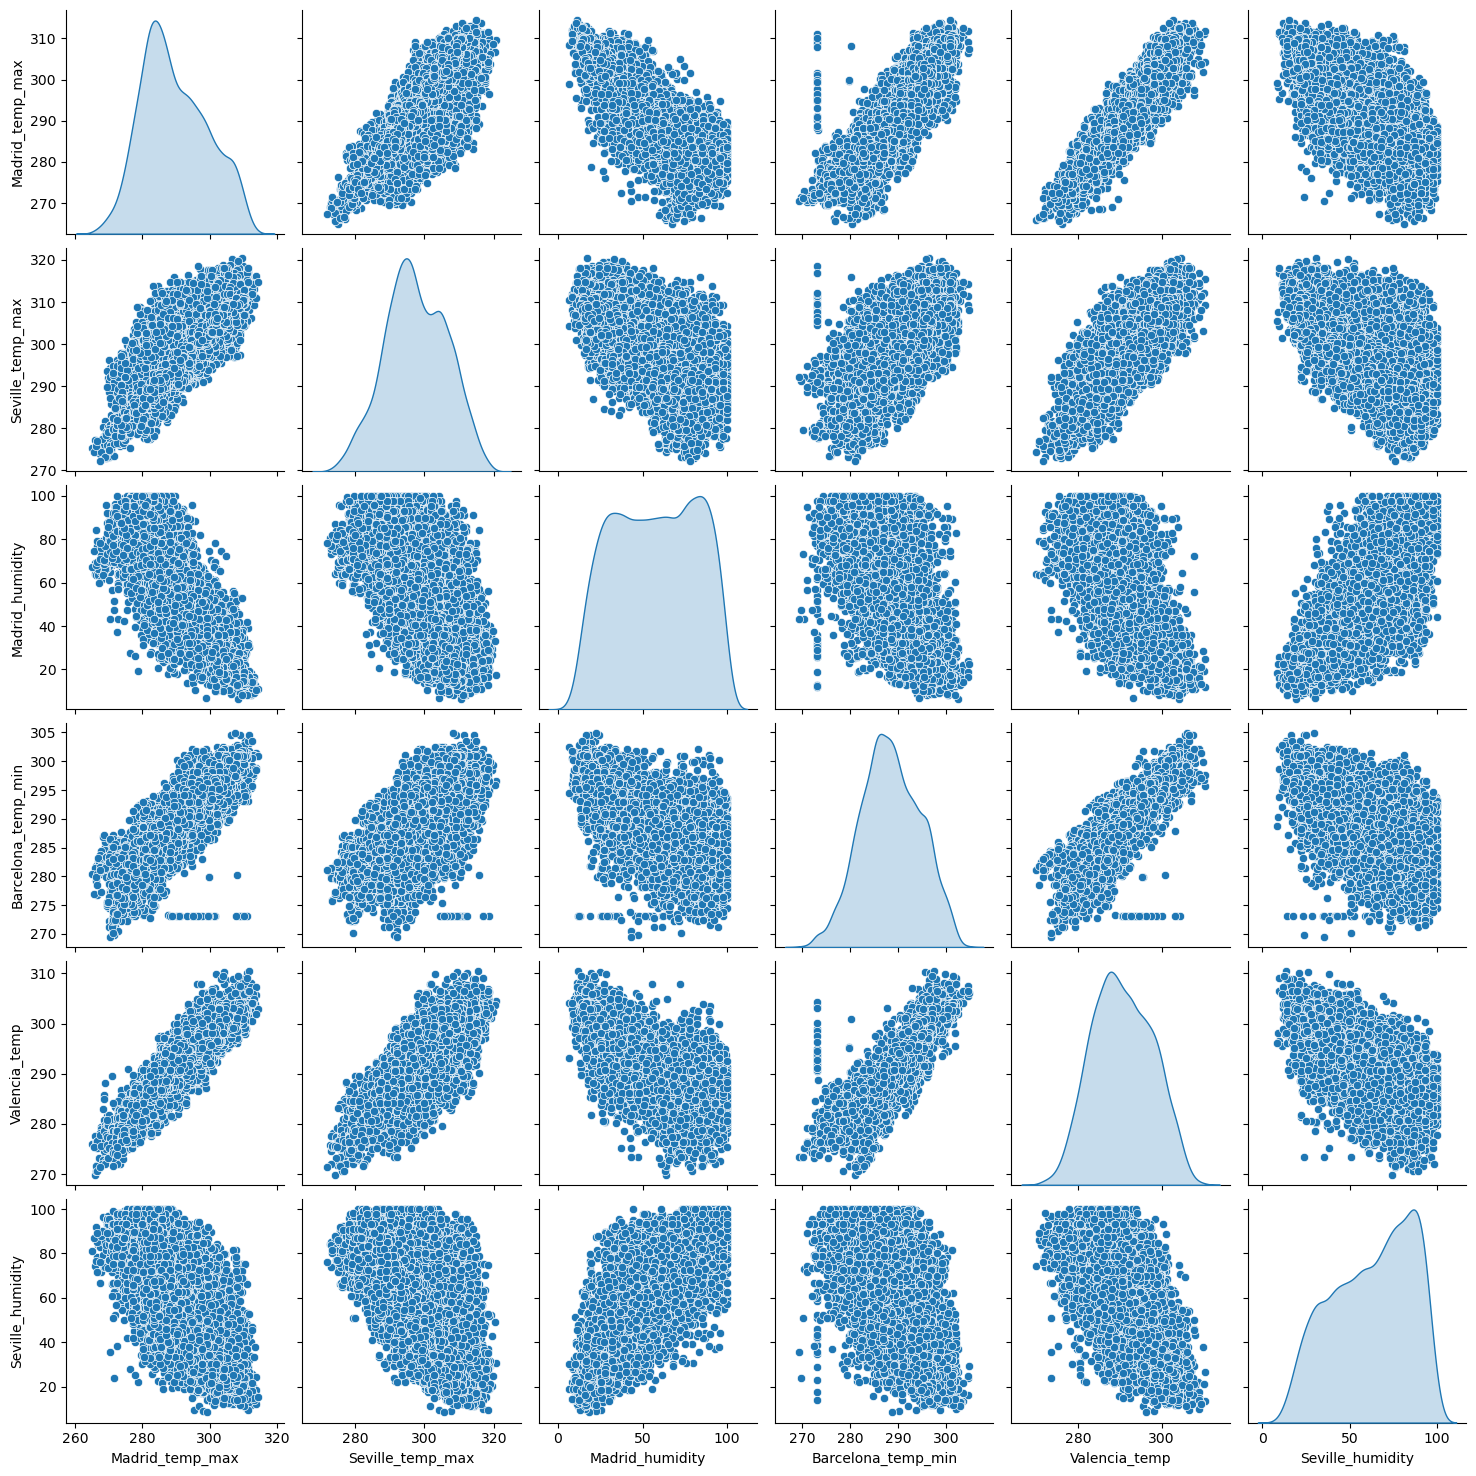

In [18]:
# evaluate correlation
import matplotlib.pyplot as plt
import seaborn as sns
# plot relevant feature interactions

# Select the relevant features for interaction analysis
selected_features = ['Madrid_temp_max', "Seville_temp_max", 'Madrid_humidity', "Barcelona_temp_min", "Valencia_temp", "Seville_humidity"]

# Create pairplots to visualize feature interactions
sns.pairplot(data=df_train[selected_features], diag_kind='kde')
plt.show()


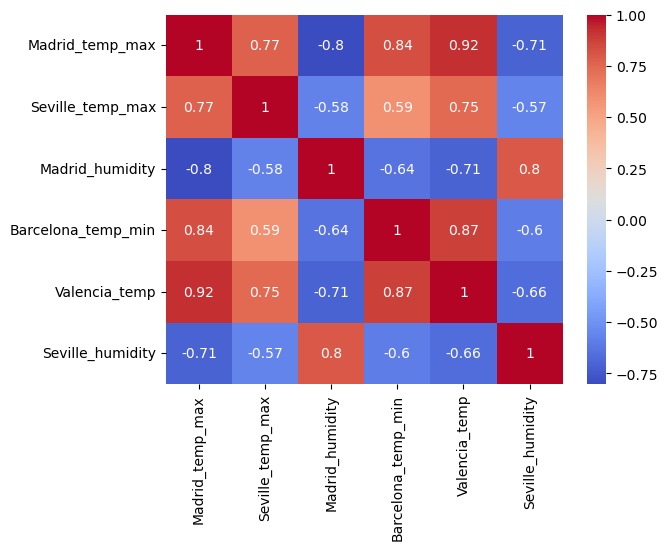

In [19]:
correlation_matrix = df_train[selected_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [20]:
#The heatmap displays the correlation coefficients between the selected features.
#Positive values indicate a positive correlation, negative values indicate a negative correlation, 
#and values closer to 0 indicate weaker or no correlation. We can see from the plot that Madrid_temp and Valencia_temp have
# a strong corrolation as well as Barcelona_temp_min and Valencia_temp.

C:\Users\x467402\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


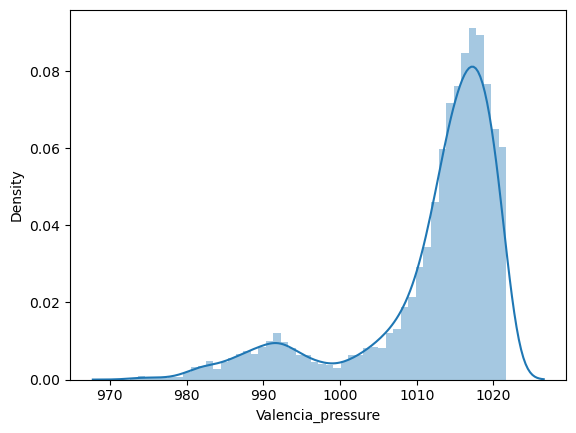

In [21]:
import seaborn as sns

sns.distplot(df_train['Valencia_pressure'])
plt.show()


In [22]:
# The scatter plots show the relationship between each selected feature and the target variable (`load_shortfall_3h`).
#There is strong relationship between the Seville_humidity and load_shortfall_3h. There is also a strong relationship between
# Madrd_humidy and laod_shortfall_3h

C:\Users\x467402\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


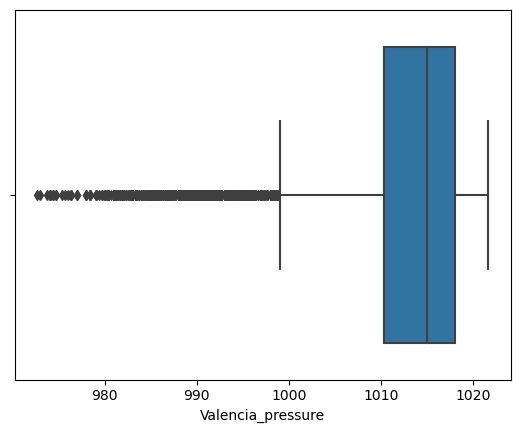

In [23]:
#Distribution of Valencia pressure
sns.boxplot(df_train['Valencia_pressure'])
plt.show()

In [24]:
print('Mode')
print(df_train['Valencia_pressure'].mode())
print('Mean')
print(df_train['Valencia_pressure'].mean())
print('Median')
print(df_train['Valencia_pressure'].median())

Mode
0    1018.0
Name: Valencia_pressure, dtype: float64
Mean
1012.0514065222828
Median
1015.0


In [25]:
# the mean and the mode are the same I will replace the null values with zero as pressure can be zero

In [26]:
# let's clean this - null-imputation to 0

df_clean = df_train

# we will be using this value to fill in the test data as well. 

vp_training_mode=df_clean['Valencia_pressure'].mode()[0]

df_clean['Valencia_pressure'] = df_clean['Valencia_pressure'].fillna(vp_training_mode)

In [27]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [28]:
#Changing datatype
df_clean['time'] = pd.to_datetime(df_clean['time'])

# create new features

df_clean['Valencia_wind_deg'] = df_clean['Valencia_wind_deg'].str.extract('(\d+)')
df_clean['Valencia_wind_deg'] = pd.to_numeric(df_clean['Valencia_wind_deg'])


In [29]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            8763 non-null   int64         
 1   time                  8763 non-null   datetime64[ns]
 2   Madrid_wind_speed     8763 non-null   float64       
 3   Valencia_wind_deg     8763 non-null   int64         
 4   Bilbao_rain_1h        8763 non-null   float64       
 5   Valencia_wind_speed   8763 non-null   float64       
 6   Seville_humidity      8763 non-null   float64       
 7   Madrid_humidity       8763 non-null   float64       
 8   Bilbao_clouds_all     8763 non-null   float64       
 9   Bilbao_wind_speed     8763 non-null   float64       
 10  Seville_clouds_all    8763 non-null   float64       
 11  Bilbao_wind_deg       8763 non-null   float64       
 12  Barcelona_wind_speed  8763 non-null   float64       
 13  Barcelona_wind_deg

In [30]:
# create new features
df_clean['time'].head()

0   2015-01-01 03:00:00
1   2015-01-01 06:00:00
2   2015-01-01 09:00:00
3   2015-01-01 12:00:00
4   2015-01-01 15:00:00
Name: time, dtype: datetime64[ns]

In [31]:
#Change time ts to hours, then drop the original time from df_clean
def hr_func(ts):
    return str(ts.hour)

df_clean['time_hour'] = df_clean['time'].apply(hr_func)
#Remove the Unnamed column and df_clean[time]
df_clean = df_clean.drop(['Unnamed: 0' , 'time'], axis = 1)
df_clean.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,time_hour
0,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,...,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,3
1,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,...,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,6
2,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,...,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667,9
3,1.000000,8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,...,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667,12
4,1.000000,7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,...,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667,15


In [32]:
#create dummies 
#create dummies 
df_clean = pd.get_dummies(df_clean, drop_first=True)
#create dummies 
df_clean = pd.get_dummies(df_clean, drop_first=True)

In [33]:
df_clean.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9,time_hour_12,time_hour_15,time_hour_18,time_hour_21,time_hour_3,time_hour_6,time_hour_9
0,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,...,0,0,0,0,0,0,0,1,0,0
1,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,...,0,0,0,0,0,0,0,0,1,0
2,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,...,0,0,0,0,0,0,0,0,0,1
3,1.000000,8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,...,0,0,0,1,0,0,0,0,0,0
4,1.000000,7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,...,0,0,0,0,1,0,0,0,0,0


In [34]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 77 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Madrid_wind_speed      8763 non-null   float64
 1   Valencia_wind_deg      8763 non-null   int64  
 2   Bilbao_rain_1h         8763 non-null   float64
 3   Valencia_wind_speed    8763 non-null   float64
 4   Seville_humidity       8763 non-null   float64
 5   Madrid_humidity        8763 non-null   float64
 6   Bilbao_clouds_all      8763 non-null   float64
 7   Bilbao_wind_speed      8763 non-null   float64
 8   Seville_clouds_all     8763 non-null   float64
 9   Bilbao_wind_deg        8763 non-null   float64
 10  Barcelona_wind_speed   8763 non-null   float64
 11  Barcelona_wind_deg     8763 non-null   float64
 12  Madrid_clouds_all      8763 non-null   float64
 13  Seville_wind_speed     8763 non-null   float64
 14  Barcelona_rain_1h      8763 non-null   float64
 15  Sevi

In [35]:
def total_missing(df,column_name):
    return df[column_name].isnull().sum()

In [48]:

def calc_mean_mode(df, column_name):
    # your code here
    if column_name not in df.columns:
        raise ValueError
    if pd.api.types.is_numeric_dtype(df[column_name]):
        return np.round(df[column_name].mean(), 2)
    else:
        return list(df[column_name].mode())
    
   

In [49]:
total_missing(df_train, 'load_shortfall_3h')

'load_shortfall_3h has 0 missing values'

In [50]:
# remove missing values/ features
### START FUNCTION
def total_missing(df,column_name):
    # your code here
    missing = df[column_name].isnull().sum()
    return column_name +" has " + str(missing)+" missing values"
### END FUNCTION

In [51]:
def calc_mean_mode(df, column_name):
    if column_name not in df.columns:
        raise ValueError
    if pd.api.types.is_numeric_dtype(df[column_name]):
        return np.round(df[column_name].mean(), 2)
    else:
        return list(df[colum_name].mode())

In [52]:
#This value indicates the average load shortfall over a 3-hour period in your dataset.
calc_mean_mode(df_train, 'load_shortfall_3h')

10673.86

In [53]:
df_clean =df
df_clean['Valencia_pressure'] = df_clean['Valencia_pressure'].fillna(df_clean['Valencia_pressure'].mode()[0])

print(df_clean.isnull().sum())


NameError: name 'df' is not defined

In [54]:
# removing sp's from seville_pressure
df_clean['Seville_pressure'] 

KeyError: 'Seville_pressure'

In [43]:
df_clean['Seville_pressure'] = df_clean['Seville_pressure'].str.extract('(\d+)')

KeyError: 'Seville_pressure'

In [44]:
df_clean['Seville_pressure'] 

KeyError: 'Seville_pressure'

In [45]:
def drop_columns(input_df, threshold, unique_value_threshold):
    #List of dropped columns
    dropped_column_names = []
    for column in input_df.columns:
        
        #drop columns if perc of Null-values is greater than threshold
        perc_null_values = input_df[column].isnull().sum() / len (input_df[column]) * 100
        if perc_null_values > threshold: 
            dropped_column_names.append(column)
            
        #list of unique values
        unique_num = []
        for item in input_df[column]:
            if item not in unique_num and not pd.isnull(item):
                unique_num.append(item)
        
        perc_unique_num = 100*len(unique_num)/len(input_df[column])
        if perc_unique_num < unique_value_threshold:
            dropped_column_names.append(column)
    
    new_df = input_df.copy()
    return new_df.drop(dropped_column_names, axis=1)  


In [46]:
df_tester = drop_columns(df_train, 80,0)

In [47]:
print (df_tester.shape)
print (df_train.shape)

(8763, 50)
(8763, 50)


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [7]:
# Let input varabiles = x and response variable =y
y = df_clean[['load_shortfall_3h']]
X = df_clean.drop('load_shortfall_3h',axis=1)

NameError: name 'df_clean' is not defined

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Build and train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)



In [ ]:
# Build and train Decision Tree Regression model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)



In [ ]:
# Create a Linear Regression model
linear_model = LinearRegression()

# Train the model on the training data
linear_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_linear = linear_model.predict(X_test)


In [ ]:
#Testing the Models

# Calculate RMSE for Linear Regression model
rmse_linear = mean_squared_error(y_test, y_pred_linear, squared=False)

# Calculate RMSE for Decision Tree Regression model
rmse_tree = mean_squared_error(y_test, y_pred_tree, squared=False)

# Calculate R-squared for Linear Regression model
r2_linear = r2_score(y_test, y_pred_linear)

# Calculate R-squared for Decision Tree Regression model
r2_tree = r2_score(y_test, y_pred_tree)


In [8]:
# Display the test results
print("Linear Regression Test Metrics:")
print(f"RMSE: {rmse_linear}")
print(f"R-squared: {r2_linear}\n")

print("Decision Tree Regression Test Metrics:")
print(f"RMSE: {rmse_tree}")
print(f"R-squared: {r2_tree}\n")


Linear Regression Test Metrics:


NameError: name 'rmse_linear' is not defined

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [9]:
# create one or more ML models
ln_model = LinearRegression()
tree_model = DecisionTreeRegressor(random_state=PARAMETER_CONSTANT,max_depth=3, min_impurity_decrease=0.02 )

NameError: name 'PARAMETER_CONSTANT' is not defined

In [ ]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
ln_model = LinearRegression()

# Train the model on your training data (X_train and y_train)
ln_model.fit(X_train, y_train)

# Now you can make predictions using the trained model
y_pred = ln_model.predict(X_test)


In [693]:
y_pred

array([[10786.70682129],
       [11974.44238524],
       [13032.72490641],
       ...,
       [12131.01530945],
       [12882.02786044],
       [ 9003.29180923]])

In [696]:
df_time = pd.DataFrame(df_test.index)
df_time.head()

,0
0,0
1,1
2,2
3,3
4,4


In [4]:
df_test.head()

NameError: name 'df_test' is not defined

In [5]:
test_pred=ln_model.predict(df_test)

NameError: name 'ln_model' is not defined

In [698]:
output = pd.DataFrame({"time":df_test['time']})

df_test['Valencia_pressure'] = df_test['Valencia_pressure'].fillna(vp_training_mode)
df_test['time'] = pd.to_datetime(df_test['time'])
df_test['Valencia_wind_deg'] = df_test['Valencia_wind_deg'].str.extract('(\d+)')
df_test['Valencia_wind_deg'] = pd.to_numeric(df_test['Valencia_wind_deg'])
df_test['time_hour'] = df_test['time'].apply(hr_func)
df_test = df_test.drop(['Unnamed: 0' , 'time'], axis = 1)

In [699]:
df_test=pd.get_dummies(df_test, drop_first=True)
df_test.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9,time_hour_12,time_hour_15,time_hour_18,time_hour_21,time_hour_3,time_hour_6,time_hour_9
0,5.000000,8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,193.333333,...,0,0,0,0,0,0,0,0,0,0
1,4.666667,8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,143.333333,...,0,0,0,0,0,0,0,1,0,0
2,2.333333,7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,130.000000,...,0,0,0,0,0,0,0,0,1,0
3,2.666667,7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,196.666667,...,0,0,0,0,0,0,0,0,0,1
4,4.000000,7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,233.333333,...,0,0,0,1,0,0,0,0,0,0


In [700]:
test_pred=ln_model.predict(df_test)

In [701]:
test_pred

array([[10746.45624945],
       [ 6034.0645589 ],
       [ 5529.57343538],
       ...,
       [12694.54341088],
       [12335.29792714],
       [13045.06598927]])

In [702]:
df_train.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,time_hour
0,0,2015-01-01 03:00:00,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,3
1,1,2015-01-01 06:00:00,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,6
2,2,2015-01-01 09:00:00,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667,9
3,3,2015-01-01 12:00:00,1.000000,8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667,12
4,4,2015-01-01 15:00:00,1.000000,7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667,15


In [703]:
output['load_shortfall_3h']=test_pred   
output.head()

,time,load_shortfall_3h
0,2018-01-01 00:00:00,10746.456249
1,2018-01-01 03:00:00,6034.064559
2,2018-01-01 06:00:00,5529.573435
3,2018-01-01 09:00:00,9227.374532
4,2018-01-01 12:00:00,10600.566728


In [724]:
output.to_csv("Busisiwe_Dlala.csv",index=False)

In [725]:
# Calculating rmse of linear regression  model and motivate why it is the best 
print(f"RMSE: {rmse_linear}")

RMSE: 4467.340059406762


In [726]:
#Calculating rsme of decisiontree_model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

In [727]:
rmse_tree = mean_squared_error(y_test, y_pred_tree, squared=False)

In [728]:
print(f"RMSE: {rmse_tree}")

RMSE: 5845.542299418904


<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic

#The Linear Regression model has an RMSE of approximately 4467.34, which means that, on average, the predicted 
#values deviate from the actual values by around 4467.34 units. The R-squared value of 0.2914 suggests that the model 
#explains about 29.14% of the variance in the dependent variable.


#The Decision Tree Regression model has a higher RMSE of around 5845.54, indicating that its predictions have a larger 
#average squared difference from the actual values compared to the Linear Regression model. The negative R-squared value 
#of -0.2133 suggests that the model might not be explaining the variance well and might even be performing worse than a 
#horizontal line (a poor model).